<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Analyse en Composantes Principales

## 1 Introduction
### 1.1 `Scikit-learn` *vs.*  R
L'objectif de ce tutoriel est d'introduire l'utilisation de la librairie `scikit-learn` de Python pour l'exploration de données multidimensionnelles. Seule l'utilisation directe des fonctions d'exploration est abordée. Se pose rapidement une question: quand utiliser `scikit-learn` de Python plutôt que R plus complet et plus simple d'emploi?

- Préférer R et ses libraires si la **présentation graphique** des résultats et leur **interprétation** est prioritaire.
- Pour l'emploi de méthodes (analyse factorielle discriminante, canonique, positionnement multidimensionnel...) pas codées en Python.
- Préférer Python et `scikit-learn` pour mettre au point une chaîne de traitements (*pipe line*) opérationnelle de l'extraction à une analyse privilégiant la prévision brute à l'interprétation et pour des données quantitatives ou rendues quantitatives ("vectorisation" de corpus de textes).

### 1.2 Fonctions de `scikit-learn`
La communauté qui développe cette librairie est très active, elle évolue rapidement.  Ne pas hésiter à consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) pour des compléments. Voici une sélection de ses principales fonctionnalités.
- Transformations (standardisation, discrétisation binaire, regroupement de modalités, imputations rudimentaires de données manquantes) , "vectorisation" de corpus de textes (encodage, catalogue, Tf-idf), images.
- Exploration: ACP, classification non supervisée (mélanges gaussiens, propagation d'affinité, ascendante hiérarchique, SOM,...). Une fonction est aojutée pour l'Analyse des Correspondances.
- Modélisation et apprentissage, voir le dépôt correspondant.


### 1.3 ACP avec `scikit-learn`
L'objectif est d'illustrer la mise en oeuvre de l'analyse en composantes principales. Consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) et ses nombreux [exemples](http://scikit-learn.org/stable/auto_examples/index.html) pour plus de détails sur l'utilisation de `scikit-learn`. 

La librairie `scikit-learn` a principalement été conçu en vue de l'analyse de signaux. Aussi, de nombreuses options de l'ACP ne sont pas disponibles, notamment les graphiques usuels (biplot, cercle des corrélations...). En revanche des résultats sont liés à la version probabiliste de l'ACP sous hypothèse d'une distribution gaussienne multidimensionnelle des données. 

**Attention**, l'ACP est centrée mais par réduite. L'option n'est pas prévue et les variables doivent être réduites (fonction `sklearn.preprocessing.scale`) avant si c'est nécessaire. L'attribut `transform` désigne les composantes principales, sous-entendu: transformation par réduction de la dimension; `n_components` fixe le nombre de composantes retenues, par défaut toutes; l'attribut `components_` contient les `n_components` vecteurs propres mais non normalisés, c'est-à-dire de norme carrée la valeur propre associée, et donc à utiliser pour représenter les variables.

D'autres versions d'analyse en composantes principales sont proposées dans `Scikit-learn`: *kernel PCA, sparse PCA, ICA*...

In [6]:
import pandas as pd

In [7]:
#chargement de la première feuille de données
X = pd.read_excel("../99 - Datasets/autos.xlsx",sheet_name=0,header=0,index_col=0)

Un code propre est un code commenté. C'est pourquoi il est intéressant de commenter les différentes étapes importantes comme ci-dessous :

In [8]:
#dimension
print(X.shape)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage du dataset
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9295       1769     83   440   165   1095    165
Op

## But du TP
Vous trouverez ci-dessous des cellules de code de l'analyse en composantes principales du dataset. Je vais vous demander de commenter chaque cellule comme je l'ai fait au-dessus. Quand un graphe ou un tableau sort d'une éxecution, je vous demande également de commenter le résulat.

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
sc = StandardScaler()
sc

StandardScaler()

In [11]:
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [12]:
print(np.mean(Z,axis=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [13]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


In [15]:
acp = PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [16]:
coord = acp.fit_transform(Z)
print(acp.n_components_)

6


In [17]:
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [18]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [19]:
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


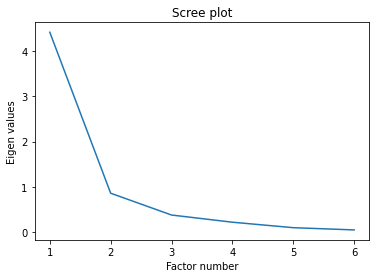

In [20]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

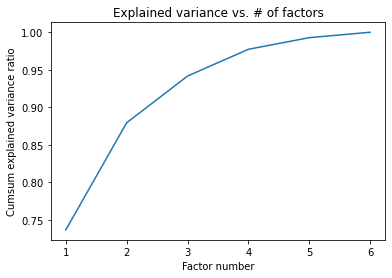

In [21]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [22]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [23]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


In [24]:
cf = pd.DataFrame(coord,index=X.index,columns=np.arange(1,p+1))
print(cf)

                        1         2         3         4         5         6
Modele                                                                     
Alfasud TI      -2.138924  1.785681  0.571862  0.201927 -0.301357  0.053921
Audi 100         1.561459 -1.527040  1.315271 -0.211352  0.148516 -0.327238
Simca 1300      -1.119385 -0.674505  0.456588 -0.167626 -0.375364  0.271803
Citroen GS Club -2.573742  0.112884  0.148570 -0.017343  0.226853  0.263476
Fiat 132         0.427855  0.695567 -0.193286 -0.627754  0.263505 -0.037153
Lancia Beta     -0.304238 -0.196149  0.675803 -0.555941 -0.445086  0.200083
Peugeot 504      0.683928 -0.933057 -0.256823  0.203134  0.208652  0.153892
Renault 16 TL   -1.948493 -0.980448 -0.619575  0.630319  0.293165  0.108642
Renault 30       4.409735  1.063633 -0.593528  0.847248 -0.374890  0.043997
Toyota Corolla  -3.985782  0.236240 -0.303133  0.265122  0.278428 -0.328892
Alfetta-1.66     0.437658  1.912448  0.024942 -0.758910  0.168103 -0.054241
Princess-180

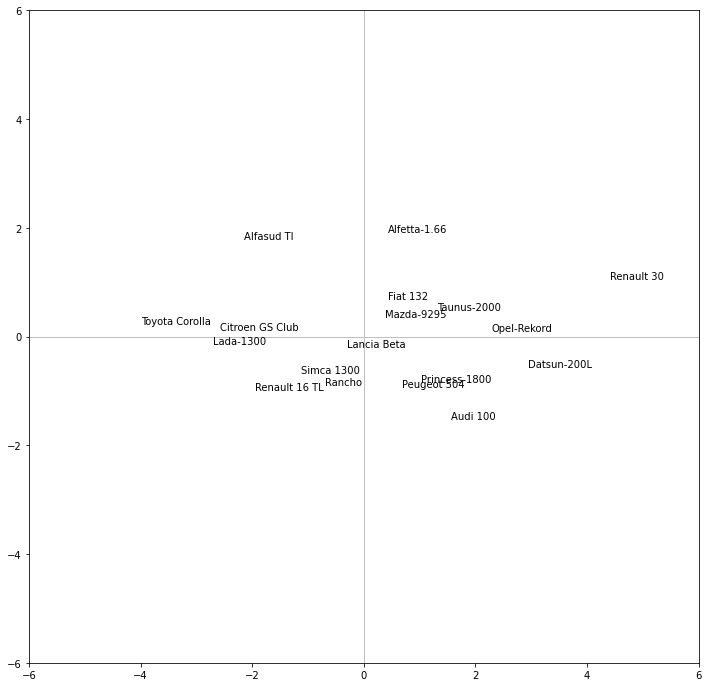

In [25]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

In [26]:
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


In [ ]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

In [ ]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

In [ ]:
print(np.sum(ctr,axis=0))
print(acp.components_)

In [ ]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))

In [ ]:
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)

In [ ]:
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

Donner les interprétations des graphes suivants :

In [ ]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

#vérification de la théorie
print(np.sum(cos2var,axis=1))

#contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

#ici, on peut vérifier
print(np.sum(ctrvar,axis=0))

#chargement des individus supplémentaires
indSupp = pd.read_excel("../99 - Datasets/autos.xlsx",sheet_name=1,header=0,index_col=0)
print(indSupp)

#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)

#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)

#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [ ]:
#importation des variables supplémentaires
varSupp = pd.read_excel("../99 - Datasets/autos.xlsx",sheet_name=2,header=0,index_col=0)
print(varSupp)

#variables supplémentaires quanti
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)

#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
        
#affichage des corrélations avec les axes
print(corSupp)

#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
for j in range(vsQuanti.shape[1]):
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [ ]:

#traitement de var. quali supplementaire
vsQuali = varSupp.iloc[:,2]
print(vsQuali)

#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)

#liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

#structure intermédiaire
df = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})

#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

## Enseignant
Patrice Mazel - patrice.mazel@protonmail.com - 3A MAM 2021/2022